## 

In [47]:
#importing necessary libriaries 
import pandas as pd #pandas will provide help with data manipulation
import numpy as np #allows quick operations on numerical data
import seaborn as sns #helps with data visualization
import matplotlib.pyplot as plt #plotting data tool
import folium #data visualization on a map
import scipy.stats as stats 
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import RFE
from pandas.api.types import is_numeric_dtype
from sklearn.preprocessing import PolynomialFeatures

In [20]:
king_raw = pd.read_csv("kc_house_data.csv") #assigning data to a pandas dataframe 
king_raw.head() #printing the first 5 rows of data from newly assigned dataframe 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [21]:
king_raw.info() #provides a summary of the dataframe so that we can understand the complete size, any missing data, and the data type of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

So, we can see that heat_source and sewer_system have a few null values we may need to replace. We also want to change the date to a numerical data type so that we can utilize the timing of purchase. Our next steps will be to describe each of the numerical columns so that we gain an idea of statistical values. 

Let's look at the distribution of our values

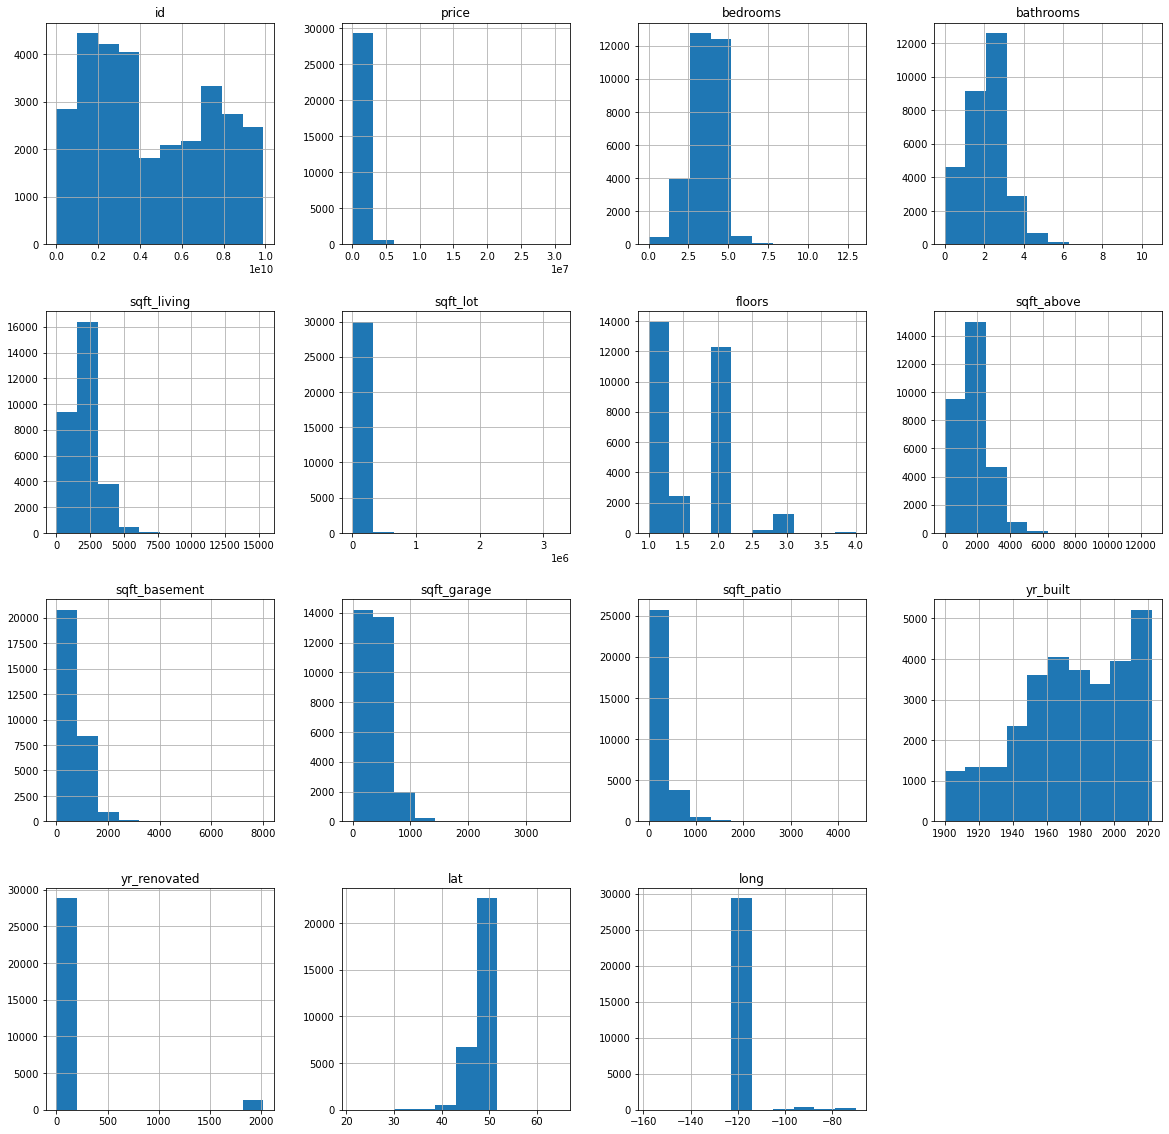

In [40]:
king_raw.hist(figsize=(20,20));

Almost all of our values do not have a normal distribution, which can create issues when performing linear regressions. I will address these distributions as we move into modeling. 

# Cleaning Data

I'm going to create a copy of the raw dataframe, then I want to start by clearing out the null values.

In [22]:
clean_king = king_raw.copy() #Creates a new dataframe that is a copy of the raw data

In [23]:
clean_king.isna().sum() #returns the total number of null values in each column

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
greenbelt         0
nuisance          0
view              0
condition         0
grade             0
heat_source      32
sewer_system     14
sqft_above        0
sqft_basement     0
sqft_garage       0
sqft_patio        0
yr_built          0
yr_renovated      0
address           0
lat               0
long              0
dtype: int64

Our data set has 30,155 entries. Seeing how few null values there are our first instinct might be to drop those rows; however, we don't want to risk decreasing the value of the other information in those rows. I'm going to look at the categories of data within both columns then convert the nulls to 'no' or '0'

In [24]:
clean_king.heat_source.value_counts() #Totals for the categories of heat_sources

Gas                  20583
Electricity           6465
Oil                   2899
Gas/Solar               93
Electricity/Solar       59
Other                   20
Oil/Solar                4
Name: heat_source, dtype: int64

In [25]:
clean_king['heat_source'] = clean_king['heat_source'].fillna('Other') #replaces any null values with Other

In [26]:
clean_king.heat_source.value_counts() #checks the column for increase to see if the replacement worked

Gas                  20583
Electricity           6465
Oil                   2899
Gas/Solar               93
Electricity/Solar       59
Other                   52
Oil/Solar                4
Name: heat_source, dtype: int64

In [27]:
clean_king.isna().sum() #checks for null value changes

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
greenbelt         0
nuisance          0
view              0
condition         0
grade             0
heat_source       0
sewer_system     14
sqft_above        0
sqft_basement     0
sqft_garage       0
sqft_patio        0
yr_built          0
yr_renovated      0
address           0
lat               0
long              0
dtype: int64

In [28]:
clean_king.sewer_system.value_counts() #total for all categories in column

PUBLIC                25777
PRIVATE                4355
PRIVATE RESTRICTED        6
PUBLIC RESTRICTED         3
Name: sewer_system, dtype: int64

In [29]:
clean_king.loc[king_raw.sewer_system.isnull(), 'sewer_system'] = "NONE" #replaces null with NONE
clean_king.sewer_system.value_counts() #checks for new NONE category

PUBLIC                25777
PRIVATE                4355
NONE                     14
PRIVATE RESTRICTED        6
PUBLIC RESTRICTED         3
Name: sewer_system, dtype: int64

In [30]:
clean_king.isna().sum() #checks for null value changes

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
greenbelt        0
nuisance         0
view             0
condition        0
grade            0
heat_source      0
sewer_system     0
sqft_above       0
sqft_basement    0
sqft_garage      0
sqft_patio       0
yr_built         0
yr_renovated     0
address          0
lat              0
long             0
dtype: int64

In [31]:
# Change to datetime and add month column
clean_king['date'] = pd.to_datetime(clean_king['date'])
clean_king['month'] = pd.DatetimeIndex(clean_king['date']).month

In [32]:
# Add house_age column
clean_king['age'] = clean_king['date'].dt.year - clean_king['yr_built']

#Change waterfront to numerical values
clean_king['waterfront'] = clean_king['waterfront'].apply(lambda x: 0 if x == 'NO' else 1)

# Change view missing value to NONE, then to numerical ordered values.
view_dict = {'NONE':0, 'FAIR':1, 'AVERAGE':2, 'GOOD':3, 'EXCELLENT':4}
clean_king['view'].replace(view_dict, inplace=True)

# Change condition to numerical ordered values.
cond_dict = {'Poor':0, 'Fair':1, 'Average':2, 'Good':3, 'Very Good':4}
clean_king['condition'].replace(cond_dict, inplace=True)

# Change grade to numerical ordered values.
clean_king['grade'] = clean_king['grade'].map(lambda x: int(x.split(' ')[0]))

#Adds a column for 'if renovated' 
clean_king['renovated'] = clean_king['yr_renovated'].apply(lambda x: 0 if x == 0 else 1)

In [33]:
#Descriptive statistics to check the distribution and if outliers might be present
clean_king.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,month,age,renovated
count,3.015500e+04,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,...,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,4.538104e+09,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,0.017211,0.295009,2.471298,...,476.039396,330.211142,217.412038,1975.163953,90.922301,47.328076,-121.317397,6.876969,46.196253,0.045498
std,2.882587e+09,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,0.130059,0.854268,0.702517,...,579.631302,285.770536,245.302792,32.067362,416.473038,1.434005,5.725475,3.113640,32.082180,0.208398
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480,1.000000,-1.000000,0.000000
25%,2.064175e+09,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326045,4.000000,18.000000,0.000000
50%,3.874011e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,0.000000,0.000000,2.000000,...,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551380,-122.225585,7.000000,44.000000,0.000000
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,0.000000,0.000000,3.000000,...,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669913,-122.116205,9.000000,68.000000,0.000000
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,1.000000,4.000000,4.000000,...,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340,12.000000,122.000000,1.000000


# Correlations and Multicollinearity

I want to find the variables with the highest correlation to price. I also want to make sure to eliminate any variables higher than 0.80 to lower the risk of multicollinearity. Since I added numerical values to our explanatory columns, we will also be able to measure their correlation. The matrix below provides a visual for how closely correlated each variable is to one another. 

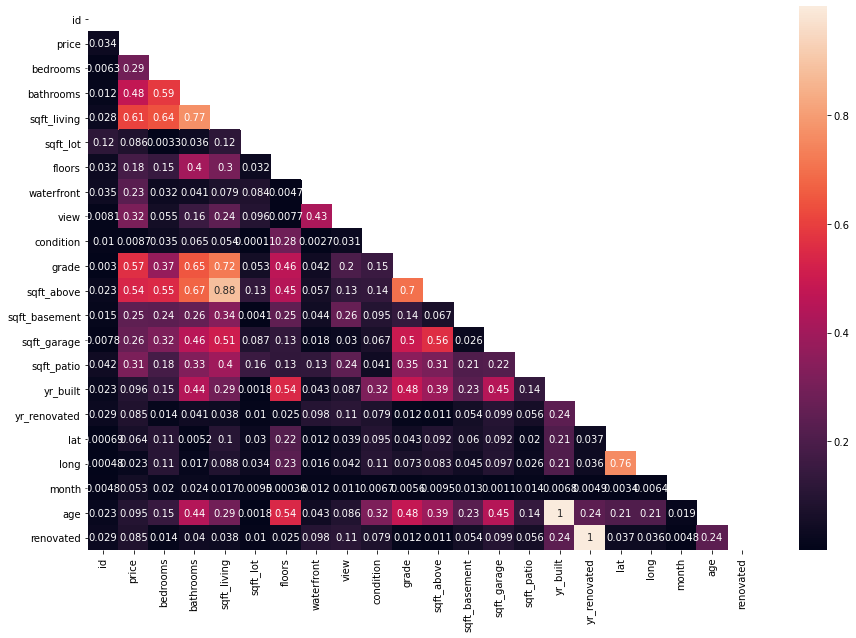

In [34]:
# A look at the Pearson correlation coefficients between variables by using a heatmap
corr = clean_king.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(15, 10))
sns.heatmap(clean_king.corr().abs(), annot=True, mask=mask);

Looking at the price, we can see that the grade, sqft_living, and bathrooms have a strong correlation. I can also see some collinearity with sqft_living and sqft_above, yr_built and age, and yr_renovated and renovated

In [35]:
clean_df = clean_king.drop(columns=['id','sqft_above','yr_renovated','yr_built'])
clean_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,...,sewer_system,sqft_basement,sqft_garage,sqft_patio,address,lat,long,month,age,renovated
0,2022-05-24,675000.0,4,1.0,1180,7140,1.0,0,NO,NO,...,PUBLIC,0,0,40,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,5,53,0
1,2021-12-13,920000.0,5,2.5,2770,6703,1.0,0,NO,YES,...,PUBLIC,1570,0,240,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,12,71,0
2,2021-09-29,311000.0,6,2.0,2880,6156,1.0,0,NO,NO,...,PUBLIC,1580,0,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,9,65,0
3,2021-12-14,775000.0,3,3.0,2160,1400,2.0,0,NO,NO,...,PUBLIC,1070,200,270,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,12,11,0
4,2021-08-24,592500.0,2,2.0,1120,758,2.0,0,NO,YES,...,PUBLIC,550,550,30,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,8,9,0


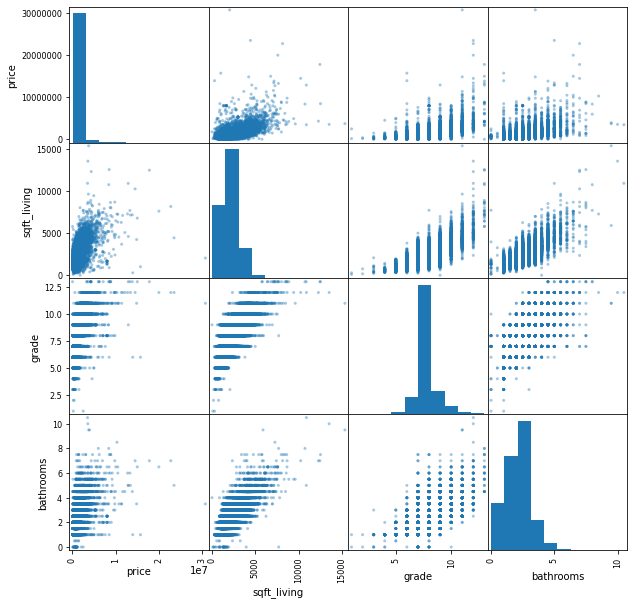

In [39]:
# Visualizing how each variable distributes with price
columns = ['price', 'sqft_living', 'grade', 'bathrooms']
pd.plotting.scatter_matrix(clean_df[columns], figsize = [10, 10], alpha=0.4);
plt.show()

None of distribution above are normal. This could be problematic when producing a linear regression; however, a noral distribution is not a requirement. 

<Figure size 432x288 with 0 Axes>

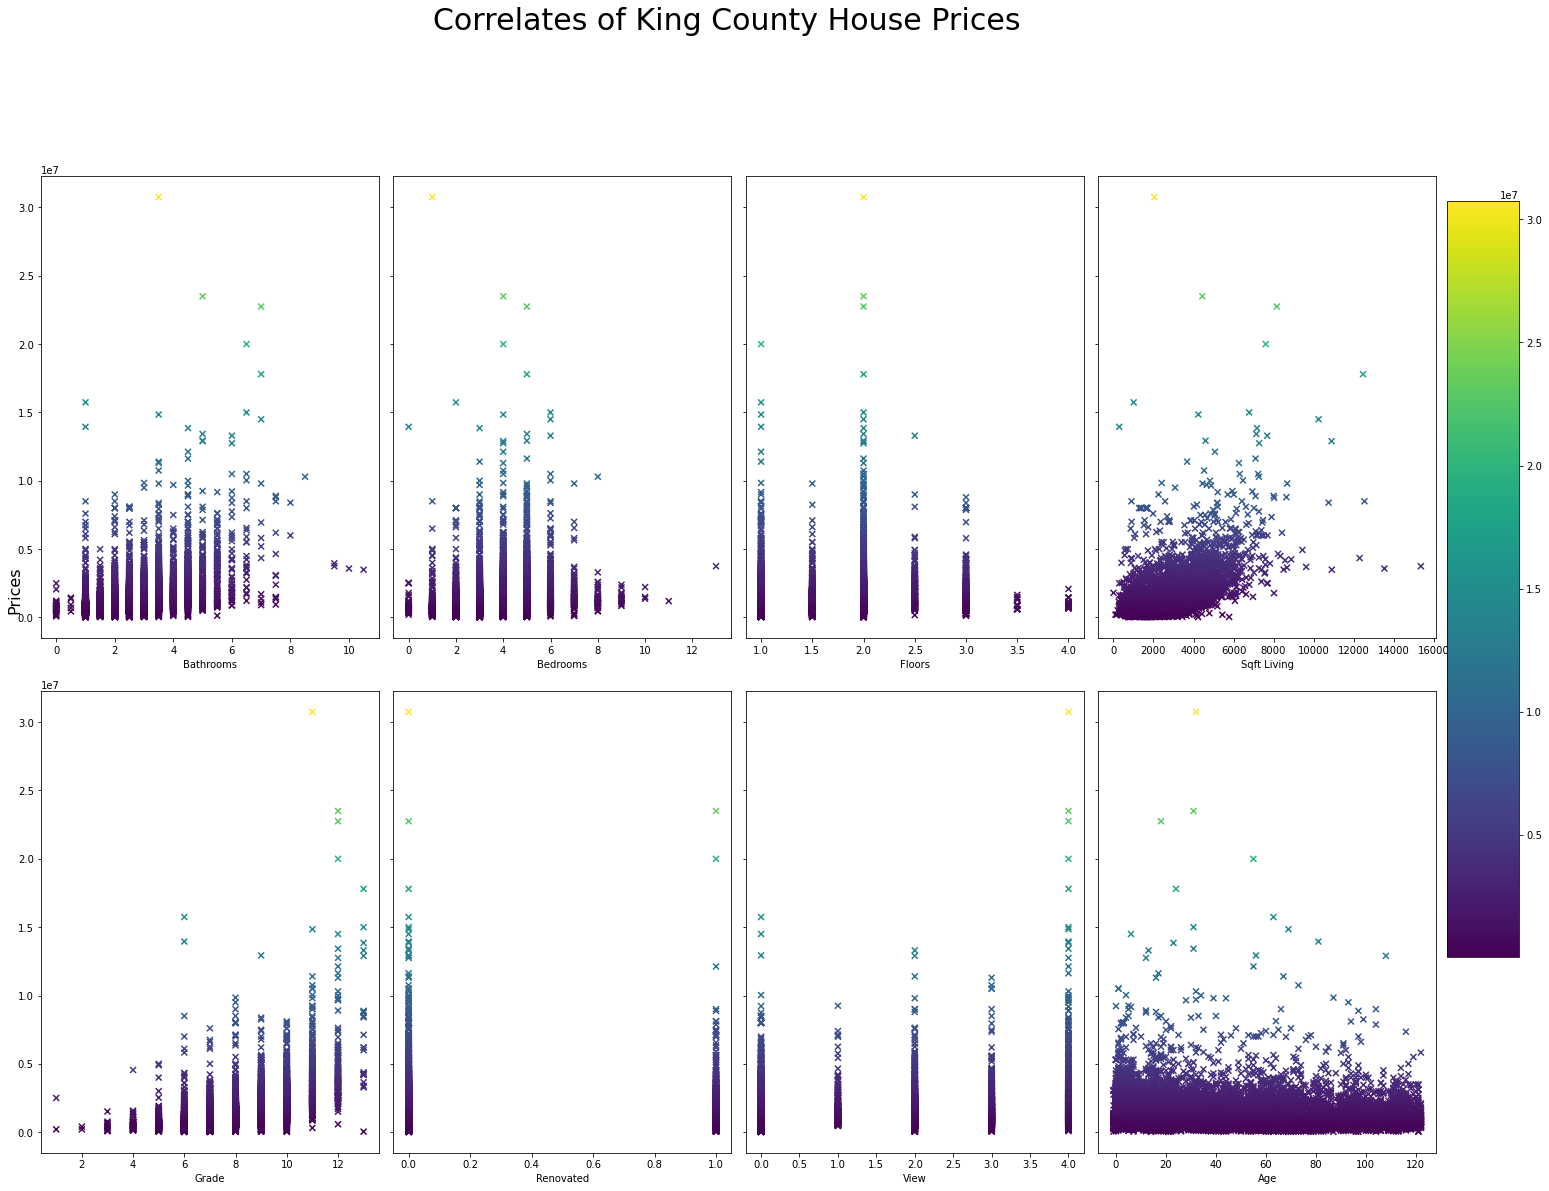

In [45]:
#Creating graphs that show the relationship of specific values to price 
f = plt.figure()
f, axes = plt.subplots(nrows = 2, ncols = 4, sharex=False, sharey = True, figsize=(20,15))

f.suptitle('Correlates of King County House Prices', fontsize=30, y=1.1)
f.text(0.0001, 0.56, 'Prices', va='center', rotation='vertical', fontsize=16)

sc = axes[0][0].scatter(clean_df['bathrooms'], clean_df['price'], c = clean_df['price'], marker = "x")
axes[0][0].set_xlabel('Bathrooms')

axes[0][1].scatter(clean_df['bedrooms'], clean_df['price'], c = clean_df['price'], marker = "x")
axes[0][1].set_xlabel('Bedrooms')

axes[1][0].scatter(clean_df['grade'], clean_df['price'], c = clean_df['price'], marker = "x")
axes[1][0].set_xlabel('Grade')

axes[1][1].scatter(clean_df['renovated'], clean_df['price'], c = clean_df['price'], marker = "x")
axes[1][1].set_xlabel('Renovated')

axes[0][2].scatter(clean_df['floors'], clean_df['price'], c = clean_df['price'], marker = "x")
axes[0][2].set_xlabel('Floors')

axes[1][2].scatter(clean_df['view'], clean_df['price'], c = clean_df['price'], marker = "x")
axes[1][2].set_xlabel('View')

sc = axes[0][3].scatter(clean_df['sqft_living'], clean_df['price'], c = clean_df['price'], marker = "x")
axes[0][3].set_xlabel('Sqft Living')

sc = axes[1][3].scatter(clean_df['age'], clean_df['price'], c = clean_df['price'], marker = "x")
axes[1][3].set_xlabel('Age')

cbar_ax = f.add_axes([1, 0.22, 0.05, 0.7])

f.colorbar(sc, cax=cbar_ax)

f.tight_layout()
plt.show();

I can see that floors, renovated, bedrooms, age, and view do not have a clear linear relationship with price. The features I would initally like to include in the multiple linear regression is sqft_living, grade, and bathrooms. The size of the living space seems to have the strongest correlation to price. 

# Modeling

In [48]:
# Use linear regression
lr = LinearRegression()

In [49]:
# Our model needs to have only numeric variables. 
def only_numeric(data):
    '''returns a dataframe with only numeric values'''
    for column in data.columns:
        if is_numeric_dtype(data[column]) == False:
            data = data.drop(column, axis=1)
        else:
            continue
    return data

In [50]:
# Splits a dataframe into X and Y dataframes given a target column.
def get_y_X(data, target):
    '''Returns a series of target (y) value and a dataframe of predictors (X)'''
    y = data[target] 
    X = data.drop(target, axis=1)
    return y, X

In [51]:
# Returns training and test R2 & RMSE metrics
def get_metrics(X_tr, X_te, y_tr, y_te):
    ''' Parameters are X train, X test, y train, & y_test
        Performs multiple regression on the split test and returns metrics'''
    lr.fit(X_tr, y_tr)
    
    train_score = lr.score(X_tr, y_tr)
    test_score = lr.score(X_te, y_te)
    
    y_hat_train = lr.predict(X_tr)
    y_hat_test = lr.predict(X_te)
    
    train_rmse = np.sqrt(mean_squared_error(y_tr, y_hat_train))
    test_rmse = np.sqrt(mean_squared_error(y_te, y_hat_test))
    
    return train_score, test_score, train_rmse, test_rmse

In [52]:
# Prints the metrics of a multiple regression train and test, with option of OLS summary on train data.
def train_test_compare(X_tr, X_te, y_tr, y_te):
    '''Parameters are X train, X test, y train, & y_test
        Performs multiple regression on the split test and prints metrics'''
    lr.fit(X_tr, y_tr)
    
    train_score = lr.score(X_tr, y_tr)
    test_score = lr.score(X_te, y_te)
    
    y_hat_train = lr.predict(X_tr)
    y_hat_test = lr.predict(X_te)
    
    train_rmse = np.sqrt(mean_squared_error(y_tr, y_hat_train))
    test_rmse = np.sqrt(mean_squared_error(y_te, y_hat_test))
    
    print(f' training data R2: {train_score}\n testing data R2: {test_score} \
                    \n training data rmse: {train_rmse}\n testing data rmse: {test_rmse}')
    
    stats_summ = input('Do you want a statsmodel summary of the train data? (y/n)')
    if stats_summ == 'y':
        inter = lr.intercept_
        stats = sm.OLS(y_tr, sm.add_constant(X_tr)).fit()
        summary = stats.summary()
        print(summary)
    
    return

## Baseline Model

In [65]:
# Defining function that splits data into training and testing data.
def train_test(data, size=.25):
    '''Takes in dataframe, and size of test for the split
        Returns the train_set and test_set'''
    train_set, test_set = train_test_split(data, test_size=size, random_state=42)
    return train_set, test_set

In [69]:
# Create the dataframe for baseline model, and drop the missing values
baseline = only_numeric(king_raw)
baseline = baseline.dropna()

clean = only_numeric(clean_df)

baseline_train_set, baseline_test_set = train_test(baseline, .25)
clean_train_set, clean_test_set = train_test(clean, .25)

In [70]:
# Getting ys and Xs for both the baseline train and test set
y_train, X_train = get_y_X(baseline_train_set, 'price')
y_test, X_test = get_y_X(baseline_test_set, 'price')

train_test_compare(X_train, X_test, y_train, y_test)

 training data R2: 0.40107712938989826
 testing data R2: 0.4585882729403118                     
 training data rmse: 700127.1132938983
 testing data rmse: 640846.4549571829
Do you want a statsmodel summary of the train data? (y/n)y
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     1081.
Date:                Mon, 20 Mar 2023   Prob (F-statistic):               0.00
Time:                        18:11:12   Log-Likelihood:            -3.3648e+05
No. Observations:               22616   AIC:                         6.730e+05
Df Residuals:                   22601   BIC:                         6.731e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                   

Looking at the r-squared value, this model only explains 40% of the variance in the training set and 45% in the testing set. This is not a good model; however, this model does explain the variance of the testing data slightly better than the training. 

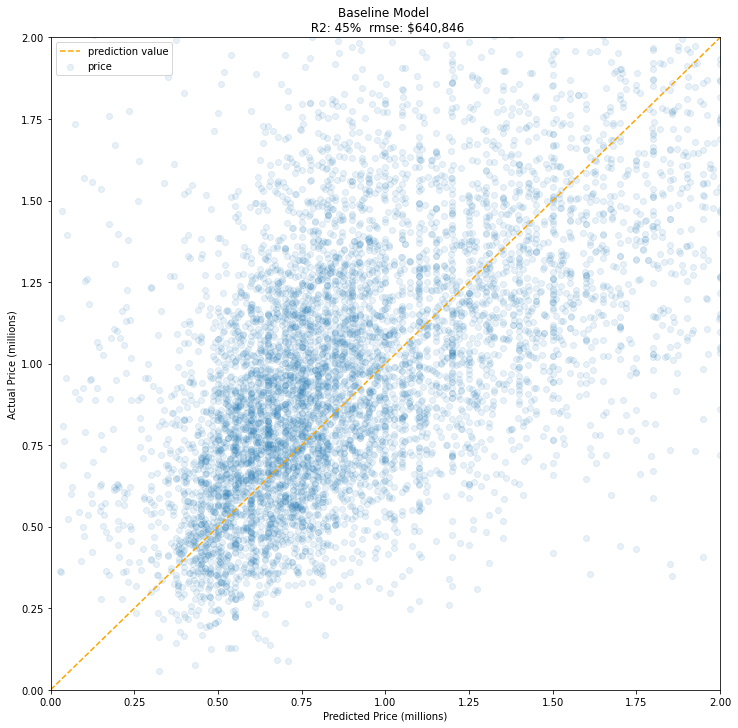

In [57]:
# Visualizing the baseline model accuracy 
y_hat = lr.predict(X_test)

fig, ax = plt.subplots(figsize=(12,12))
perfect_line = np.arange(0, 3)
ax.plot(perfect_line, linestyle="--", color="orange", label='prediction value')
ax.scatter(y_test/1000000, y_hat/1000000, alpha=0.1, label='price')
plt.xlim(0, 2)
plt.ylim(0, 2)
ax.set_xlabel("Predicted Price (millions)")
ax.set_ylabel("Actual Price (millions)")
ax.set_title("Baseline Model \n R2: 45%  rmse: $640,846")
ax.legend();

## Clean Model

In [71]:
# Getting ys and Xs for both the clean train and test set
y_train, X_train = get_y_X(clean_train_set, 'price')
y_test, X_test = get_y_X(clean_test_set, 'price')

train_test_compare(X_train, X_test, y_train, y_test)

 training data R2: 0.47153631246212013
 testing data R2: 0.5334038790152386                     
 training data rmse: 657656.3582903892
 testing data rmse: 594922.944840839
Do you want a statsmodel summary of the train data? (y/n)y
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     1186.
Date:                Mon, 20 Mar 2023   Prob (F-statistic):               0.00
Time:                        18:11:20   Log-Likelihood:            -3.3506e+05
No. Observations:               22616   AIC:                         6.702e+05
Df Residuals:                   22598   BIC:                         6.703e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                    

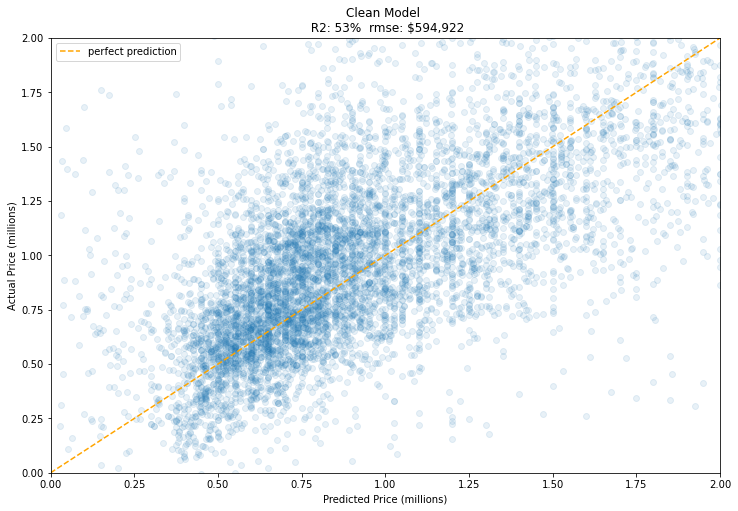

In [72]:
# Visualizing the new model's accuracy
y_hat = lr.predict(X_test)

fig, ax = plt.subplots(figsize=(12,8))
perfect_line = np.arange(0, 3)
ax.plot(perfect_line, linestyle="--", color="orange", label='perfect prediction')
ax.scatter(y_test/1000000, y_hat/1000000, alpha=0.1)
plt.xlim(0, 2)
plt.ylim(0, 2)
ax.set_xlabel("Predicted Price (millions)")
ax.set_ylabel("Actual Price (millions)")
ax.set_title("Clean Model \n R2: 53%  rmse: $594,922")
ax.legend();